In [1]:
import os
from argparse import ArgumentParser
from gc import callbacks
from subprocess import call
import PIL
import random
import matplotlib.image as im
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from pytorch_gradcam import gradcam
from gradcam import GradCAM, GradCAMpp
from gradcam.utils import visualize_cam
from torchvision import transforms
from torchvision.utils import make_grid, save_image
import pytorch_lightning as pl
import torch
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report,
                             confusion_matrix)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.svm import SVC
from torchsummary import summary
from PIL import Image
from matplotlib import cm
from datasets.seven_point_dataset import SevenPointDataset
from datasets.isic_2019 import ISIC2019Dataset

from gradcam import *
from model import SimpleClassifier

In [6]:
dataset = SevenPointDataset('/space/derma-data/seven_point', batch_size=26, normalize_weights=True, use_metadata=0)
#ISIC dataset
# dataset = ISIC2019Dataset('/space/derma-data/isic-2019', batch_size=batch_size, normalize_weights=True, md_choice='all', sampling_rate=-1)

dataset.setup()
early_stopping=False #flag
#optimizer=adam
model = SimpleClassifier(model_name='resnet50',learning_rate=5e-4,
                        class_weights=list(dataset.class_weights),
                        num_classes=dataset.num_classes,
                        check_early_stop=early_stopping,
                        #optimizer=optimizer                            
                        )

#checkpoint = torch.load('saved_model.ckpt') #vgg16, 1e-3, batch 32, 350epoch

checkpoint = torch.load('/u/home/javadov/ai_kit/ai-student-starter-kit/checkpoints/melornotdata_resnet_50.ckpt')
model.load_state_dict(checkpoint['state_dict'])
if early_stopping:
    callbacks=[EarlyStopping(min_delta=0.001,monitor="val_loss", patience=10,strict=False, verbose=True,mode="min")]
else:
    callbacks=None
print(model)
trainer = pl.Trainer(devices=1,
                     accelerator='gpu',
                     logger=False,
                     callbacks=callbacks,
                     checkpoint_callback=False,
                    )

predictions = trainer.predict(model, dataset.test_dataloader())


features, labels = zip(*predictions)

''' 
    zip():
    Makes an iterator that aggregates elements from each of the iterables.
    Merges by appending the elements one to the other, by grouping elements with the same index.

    about *:
    It is an unpacking operator.
    about **:
    It is an unpacking operator for dictionaries.
'''
features = torch.vstack(features)

'''  
    torch.vstack(): 
    Stacks tensors in sequence vertically (row wise).

'''

# features is a batch_size X output_size tensor
labels = torch.cat(labels)
model

AA      indexes
0          6
1          8
2         15
3         34
4         41
..       ...
390      914
391      946
392      961
393      995
394     1010

[395 rows x 1 columns]
     Unnamed: 0  case_num     diagnosis  seven_point_score pigment_network  \
16           16        17  NOT MELANOMA                  3          absent   
17           17        18  NOT MELANOMA                  4          absent   
22           22        23  NOT MELANOMA                  3          absent   
27           27        28  NOT MELANOMA                  0          absent   
29           29        30  NOT MELANOMA                  0          absent   
..          ...       ...           ...                ...             ...   
950         950       951  NOT MELANOMA                  2        atypical   
977         977       978  NOT MELANOMA                  1         typical   
981         981       982  NOT MELANOMA                  0          absent   
983         983       984  NOT MELANO

     Unnamed: 0  case_num     diagnosis  seven_point_score pigment_network  \
16           16        17  NOT MELANOMA                  3          absent   
17           17        18  NOT MELANOMA                  4          absent   
22           22        23  NOT MELANOMA                  3          absent   
27           27        28  NOT MELANOMA                  0          absent   
29           29        30  NOT MELANOMA                  0          absent   
..          ...       ...           ...                ...             ...   
950         950       951  NOT MELANOMA                  2        atypical   
977         977       978  NOT MELANOMA                  1         typical   
981         981       982  NOT MELANOMA                  0          absent   
983         983       984  NOT MELANOMA                  0          absent   
988         988       989  NOT MELANOMA                  0          absent   

       streaks         pigmentation regression_structures dots_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      Unnamed: 0  case_num     diagnosis  seven_point_score pigment_network  \
5              5         6  NOT MELANOMA                  1          absent   
11            11        12  NOT MELANOMA                  2          absent   
13            13        14  NOT MELANOMA                  2          absent   
19            19        20  NOT MELANOMA                  3          absent   
25            25        26  NOT MELANOMA                  2          absent   
...          ...       ...           ...                ...             ...   
975          975       976  NOT MELANOMA                  0          absent   
993          993       994  NOT MELANOMA                  1          absent   
996          996       997  NOT MELANOMA                  0         typical   
1000        1000      1001  NOT MELANOMA                  0          absent   
1005        1005      1006  NOT MELANOMA                  0          absent   

     streaks       pigmentation regression_structur

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      Unnamed: 0  case_num     diagnosis  seven_point_score pigment_network  \
6              6         7  NOT MELANOMA                  0          absent   
8              8         9  NOT MELANOMA                  0          absent   
15            15        16  NOT MELANOMA                  0          absent   
34            34        35  NOT MELANOMA                  2          absent   
41            41        42  NOT MELANOMA                  0          absent   
...          ...       ...           ...                ...             ...   
914          914       915  NOT MELANOMA                  9        atypical   
946          946       947  NOT MELANOMA                  0          absent   
961          961       962  NOT MELANOMA                  1          absent   
995          995       996  NOT MELANOMA                  0          absent   
1010        1010      1011      MELANOMA                  2          absent   

        streaks       pigmentation regression_struc

/u/home/javadov/miniconda3/envs/dermaproj1/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/u/home/javadov/miniconda3/envs/dermaproj1/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

/u/home/javadov/miniconda3/envs/dermaproj1/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
/u/home/javadov/miniconda3/envs/dermaproj1/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:151: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5]


SimpleClassifier(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(


Predicting: 0it [00:00, ?it/s]

SimpleClassifier(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(


In [10]:
#GRAD_CAM
iterator= iter(dataset.test_dataloader())
(input_original, input, _, label) = next(iterator)
images=[]

In [33]:
img = np.transpose(input_original.cpu().detach().numpy()[16,:,:,:],(1,2,0))*255
img = img.astype(np.uint8)
pil_img = Image.fromarray(img).convert('RGB')
torch_img = transforms.Compose([transforms.Resize((224, 224)),transforms.ToTensor()])(pil_img)
normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]
gradcam = GradCAM.from_config(model_type='resnet', arch=model, layer_name='backbone.layer4')
# extended_input = (input[idx])[None,:]
mask, logit = gradcam(normed_torch_img, class_idx=None)

# make heatmap from mask and synthesize saliency map using heatmap and img
heatmap, cam_result = visualize_cam(mask, torch_img)
# heatmap, cam_result = visualize_cam(mask, np.transpose(torch.unsqueeze(input[idx].permute(1,2,0),dim=-1)))

images=[]
images.extend([torch_img, heatmap, cam_result])

In [34]:
grid_image = make_grid(images, nrow=1)
result=transforms.ToPILImage()(grid_image)

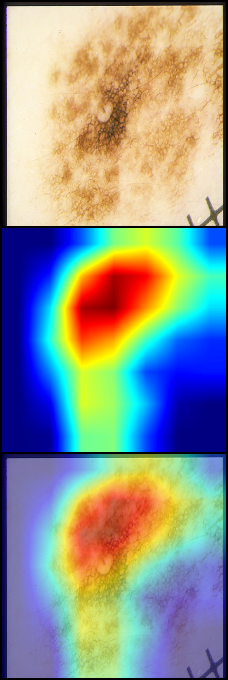

In [35]:
result

In [36]:
img = np.transpose(input_original.cpu().detach().numpy()[16,:,:,:],(1,2,0))*255
img = img.astype(np.uint8)
pil_img = Image.fromarray(img).convert('RGB')
torch_img = transforms.Compose([transforms.Resize((224, 224)),transforms.ToTensor()])(pil_img)
normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]
gradcam = GradCAM.from_config(model_type='resnet', arch=model, layer_name='backbone.layer4')
# extended_input = (input[idx])[None,:]
mask, logit = gradcam(normed_torch_img, class_idx=None)

# make heatmap from mask and synthesize saliency map using heatmap and img
heatmap, cam_result = visualize_cam(mask, torch_img)
# heatmap, cam_result = visualize_cam(mask, np.transpose(torch.unsqueeze(input[idx].permute(1,2,0),dim=-1)))

images=[]
images.extend([torch_img, heatmap, cam_result])
grid_image = make_grid(images, nrow=1)
result=transforms.ToPILImage()(grid_image)


In [37]:
import imageio as iio

In [38]:
img = iio.imread("/u/home/javadov/ai_kit/ai-student-starter-kit/images/test_mel.jpg")


/tmp/ipykernel_1927464/889113952.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread("/u/home/javadov/ai_kit/ai-student-starter-kit/images/test_mel.jpg")


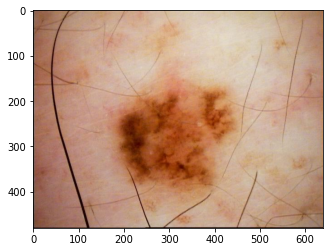

In [40]:
plt.imshow(img)

In [62]:
import imageio as iio

img = iio.imread("/u/home/javadov/ai_kit/ai-student-starter-kit/images/test_mel.jpg")
print(type(img))
img = img.astype(np.uint8)
pil_img = Image.fromarray(img).convert('RGB')
torch_img = transforms.Compose([transforms.Resize((224, 224)),transforms.ToTensor()])(pil_img)
normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]
gradcam = GradCAM.from_config(model_type='resnet', arch=model, layer_name='backbone.layer4')
# extended_input = (input[idx])[None,:]
mask, logit = gradcam(normed_torch_img, class_idx=None)

# make heatmap from mask and synthesize saliency map using heatmap and img
heatmap, cam_result = visualize_cam(mask, torch_img)
# heatmap, cam_result = visualize_cam(mask, np.transpose(torch.unsqueeze(input[idx].permute(1,2,0),dim=-1)))

images=[]
images.extend([torch_img, heatmap, cam_result])
grid_image = make_grid(images, nrow=1)
result=transforms.ToPILImage()(grid_image)

/tmp/ipykernel_1927464/3637649218.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread("/u/home/javadov/ai_kit/ai-student-starter-kit/images/test_mel.jpg")


<class 'imageio.core.util.Array'>


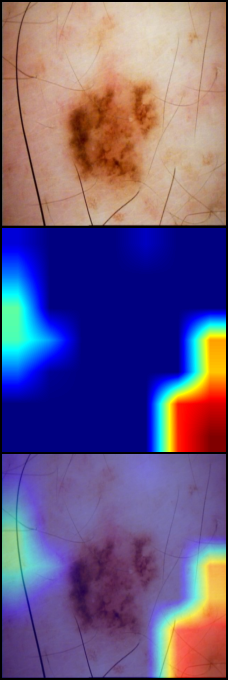

In [63]:
result

In [55]:
img.shape

(480, 640, 3)

In [52]:
normed_torch_img.shape

torch.Size([1, 3, 224, 224])

<h3> Area under the Receiver Operating Characteristic Curve (AUROC) </h3>

In [88]:
from torchmetrics import AUROC

auroc = AUROC(num_classes=2)
auroc(features, labels)


tensor(0.8489)

<h3> ROC </h3>

In [90]:
from torchmetrics.functional import roc

fpr, tpr, thresholds = roc(features, labels, num_classes=2)

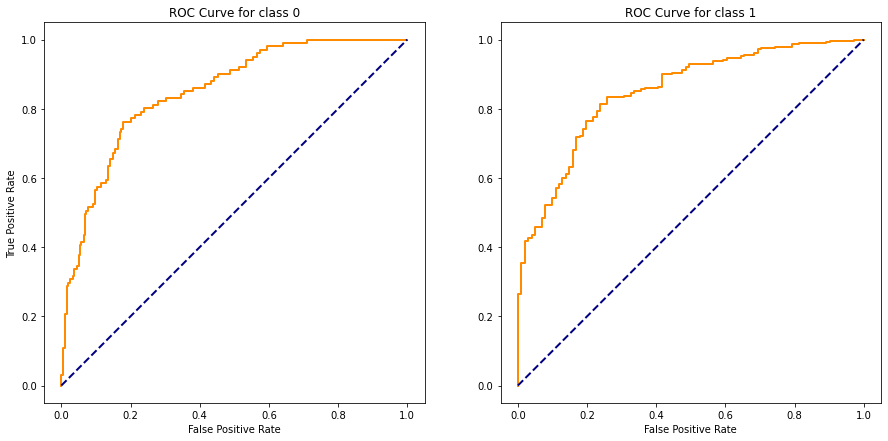

<Figure size 432x288 with 0 Axes>

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 7))

plt.figure()
lw = 2
ax1.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve",
)

ax1.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax2.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve",
)
ax2.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Curve for class 0")
ax2.set_xlabel('False Positive Rate')
ax2.set_title("ROC Curve for class 1")

plt.show()